<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تشخیص معدل دانش آموزان</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این سوال قصد داریم با استفاده از یک مجموعه‌داده که شامل اطلاعات دانش‌آموزان است، معدل آن‌ها را تخمین بزنیم. برای این‌کار شما باید پس از پیش‌پردازش داده‌ها، به مهندسی ویژگی و ساخت مدل مناسب بپردازید. توجه داشته باشید، در انتها، تنها مدل شما مورد بررسی قرار خواهد گرفت، اما مسلماً هرچه پیش‌پردازش و مهندسی ویژگی بهتری داشته باشید در نهایت به مدل بهتری خواهید رسید.

</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در فایل اولیه‌ی این سوال یک پوشه با نام <code>data</code> قرار دارد.
    این پوشه شامل دو فایل با نام‌های <code>train.csv</code> و <code>test.csv</code> است که به‌ترتیب مجموعه‌داده‌ی آموزش و آزمون هستند.
    مجموعه‌داده‌ی آموزش این سوال شامل ۱۹۱۳ سطر و ۱۴ ستون است و
        مجموعه‌داده‌ی آزمون دارای ۴۷۹ سطر است و تنها ستون <code>GPA</code> را ندارد.
    توضیحات مربوط به ستون‌ها به شرح زیر است:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>نام ویژگی</b> | <b>توضیح ویژگی</b> |
| :---: | :---: |
| <code>StudentID</code> | شماره‌ی دانش‌آموزی|
| <code>Age</code> | سن فرد|
| <code>Gender</code> | جنسیت، ۰ برای آقایان و ۱ برای خانم‌ها|
| <code>Ethnicity</code> |قومیت دانش‌آموزان|
| <code>ParentalEducation</code> |سطح تصحیلات خانواده‌ی دانش‌آموز|
| <code>StudyTimeWeekly</code> | ساعت مطالعه‌ی هفتگی از ۰ تا ۲۰ ساعت|
| <code>Absences</code> | تعداد غیبت دانش‌آموز در یک سال تحصیلی از ۰ تا ۳۰|
| <code>Tutoring</code> | وضعیت تدریس خصوصی، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده بله|
| <code>ParentalSupport</code> | میزان حمایت والدین از دانش‌آموز|
| <code>Extracurricular</code> | شرکت در برنامه‌های فوق‌برنامه، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله|
| <code>Sports</code> | شرکت در برنامه‌های ورزشی، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله||
| <code>Music</code> | شرکت در برنامه‌های موسیقی، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله||
| <code>Volunteering</code> | شرکت در برنامه‌های داوطلبانه، ۰ نشان‌دهنده‌ی خیر و ۱ نشان‌دهنده‌ی بله||
| <code>GPA</code> | میانگین نمره در بازه‌ی صفر تا چهار|

</font>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:500%; font-family:vazir; font-size:medium">
<font color="red" size=3><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
داده‌های ارزیابی ممکن است داده‌ی گم‌شده (Nan) داشته باشند.
</font>
</p>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    در ابتدا نیاز است فایل‌های مجموعه‌داده را بخوانید. نمونه‌های آموزشی در فایل <code>train.csv</code> و نمونه‌های آزمون که باید مقدار متغیر هدف آن‌ها را پیش‌بینی کنید در فایل <code>test.csv</code> ذخیره شده‌اند. اگر لازم دانستید می‌توانید به دلخواه خود بخشی از مجموعه‌ی آموزش را به عنوان مجموعه‌ی اعتبارسنجی نیز جدا کنید.
</font>
</p>


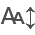

In [21]:
import pandas as pd
import numpy as np
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import category_encoders as ce

In [2]:
def clf_ccore(y_true, y_pred,data_name):

    print(f'*********{data_name}*********')
    R2 = r2_score(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    MAE = mean_absolute_error(y_true, y_pred)
  

    data = {
        'Metric': ['R2_SCORE', 'MSE', 'MAE'],
         'Score': [R2, MSE, MAE]
    }
    df_clf = pd.DataFrame(data)
    print(df_clf)

In [3]:
# Reading/Loading the dataset files
# TODO
df = pd.read_csv('train.csv')
df.set_index('StudentID', inplace=True)

df_final = pd.read_csv('test.csv')
df_final.set_index('StudentID', inplace=True)

df

Age  Gender         Ethnicity ParentalEducation  StudyTimeWeekly  \
StudentID                                                                     
1643        18       1         Caucasian            Higher        18.118879   
2753        16       1             Other      Some College         2.469271   
2402        17       0             Asian          Bachelor         3.456401   
3033        17       1         Caucasian       High School        15.838131   
1991        16       0         Caucasian               NaN         1.045373   
...        ...     ...               ...               ...              ...   
2639        15       0  African American               NaN        13.092424   
2096        16       0         Caucasian      Some College         2.159249   
2131        16       1         Caucasian      Some College         3.572578   
2295        18       0             Other      Some College         4.402585   
1861        18       0  African American      Some College         5.427628   

           Absences  Tutoring ParentalSupport  Extracurricular  Sports  Music  \
StudentID                                                                       
1643             24         1             NaN                1       1      0   
2753             19         0             Low                0       0      0   
2402             25         0             NaN                0       0      0   
3033             25         1        Moderate                0       0      0   
1991             19         1        Moderate                0       0      1   
...             ...       ...             ...              ...     ...    ...   
2639             13         1             Low                0       0      0   
2096             19         0       Very High                0       1      0   
2131             14         1        Moderate                1       1      0   
2295             20         0            High                0       0      0   
1861             27         0        Moderate                0       0      0   

           Volunteering       GPA  
StudentID                          
1643                  0  1.396278  
2753                  1  0.754751  
2402                  0  0.136166  
3033                  0  1.172192  
1991                  0  1.747356  
...                 ...       ...  
2639                  0  1.595627  
2096                  0  1.523945  
2131                  0  2.051919  
2295                  0  1.348997  
1861                  0  0.012063  

[1913 rows x 13 columns]

In [4]:
df.isna().sum()

Age                    0
Gender                 0
Ethnicity              0
ParentalEducation    182
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport      162
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                    0
dtype: int64

In [5]:
df_final.isna().sum()

Age                   0
Gender                0
Ethnicity             0
ParentalEducation    61
StudyTimeWeekly       0
Absences              0
Tutoring              0
ParentalSupport      50
Extracurricular       0
Sports                0
Music                 0
Volunteering          0
dtype: int64

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌پردازش و مهندسی ویژگی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
        در این سوال شما می‌توانید از هر تکنیک پیش‌پردازش/مهندسی ویژگی دلخواهتان، استفاده کنید.
    <br>
    تکنیک‌هایی که استفاده می‌کنید به شکل مستقیم مورد ارزیابی توسط سامانه داوری قرار <b>نمی‌گیرند.</b> بلکه همه آن‌ها در دقت مدل شما تاثیر خواهند گذاشت؛ بنابراین هر چه پیش‌پردازش/مهندسی ویژگی بهتری انجام دهید تا دقت مدل بهبود پیدا کند، امتیاز بیشتری از این سوال کسب خواهید کرد.

</font>
</p>

In [6]:
# Preprocessing step
# TODO
df['ParentalEducation'] = df['ParentalEducation'].fillna('Unknown')
df['ParentalSupport'] = df['ParentalSupport'].fillna('Unknown')

df_final['ParentalEducation'] = df_final['ParentalEducation'].fillna('Unknown')
df_final['ParentalSupport'] = df_final['ParentalSupport'].fillna('Unknown')

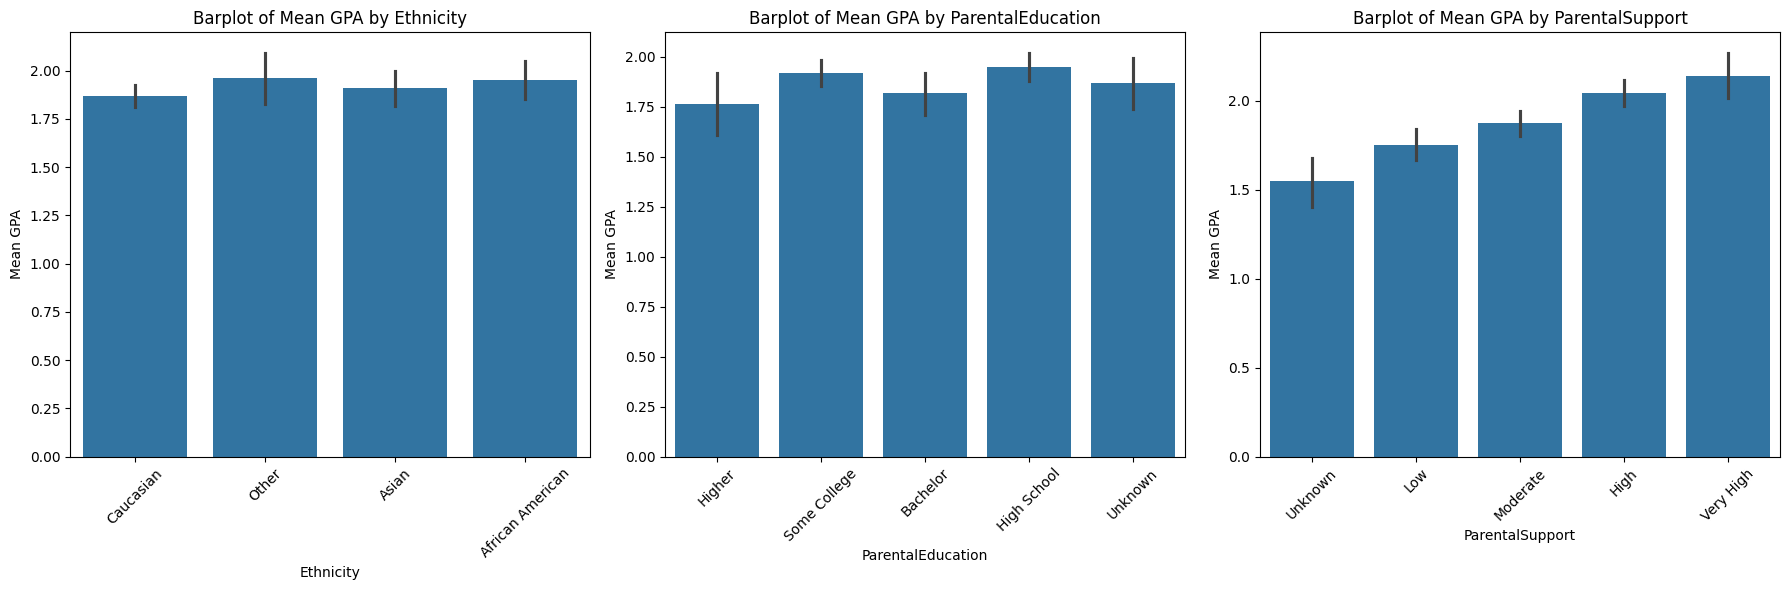

In [8]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 6))


for i, col in enumerate(categorical_columns[:3]): 
    plt.subplot(1, 3, i+1)  
    sns.barplot(x=col, y='GPA', data=df, estimator='mean')
    plt.xlabel(col)
    plt.ylabel('Mean GPA')
    plt.title(f'Barplot of Mean GPA by {col}')
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

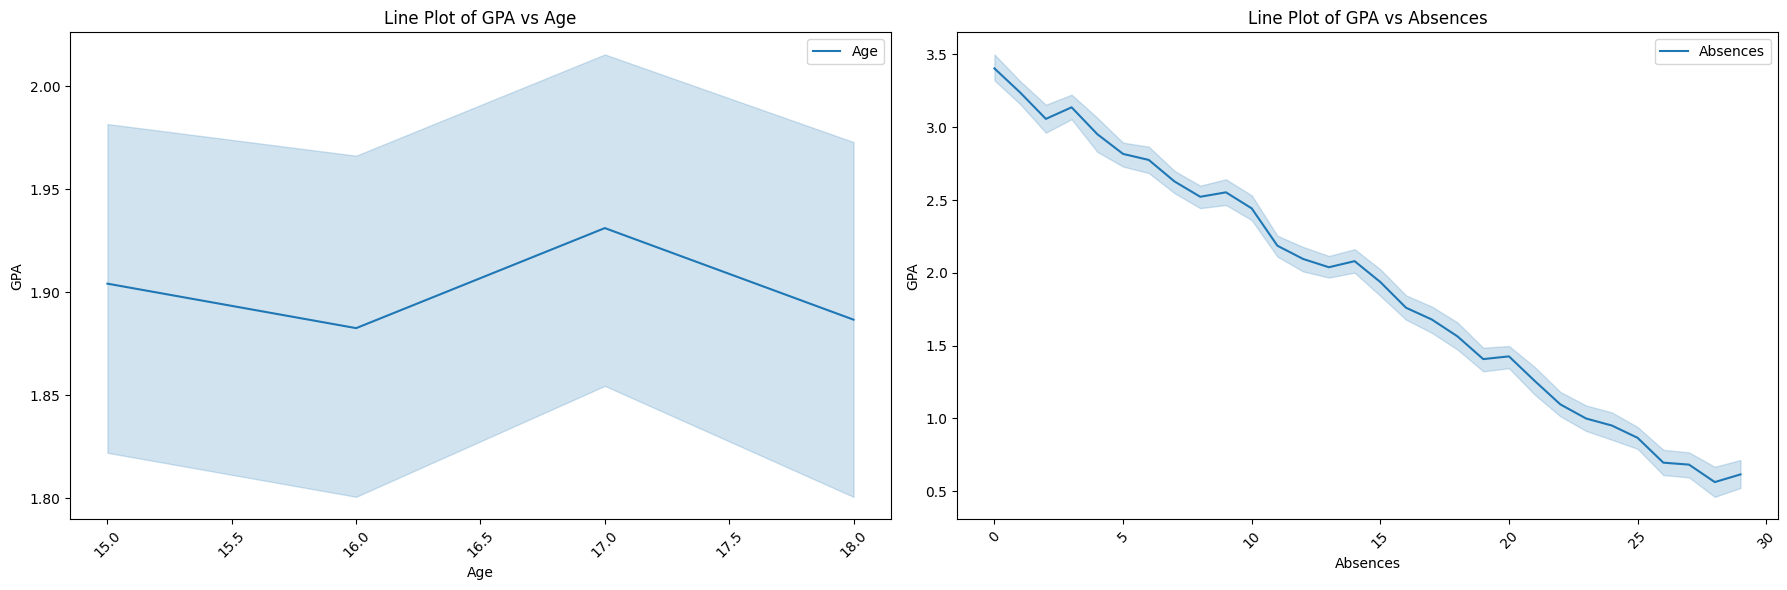

In [9]:
plt.figure(figsize=(18, 6))


for i, col in enumerate(['Age', 'Absences']):  
    plt.subplot(1, 2, i+1)  
    sns.lineplot(x=df[col], y=df['GPA'], label=col)  
    plt.xlabel(col)  
    plt.ylabel('GPA')  
    plt.title(f'Line Plot of GPA vs {col}')  
    plt.xticks(rotation=45)  

plt.tight_layout()  
plt.show()

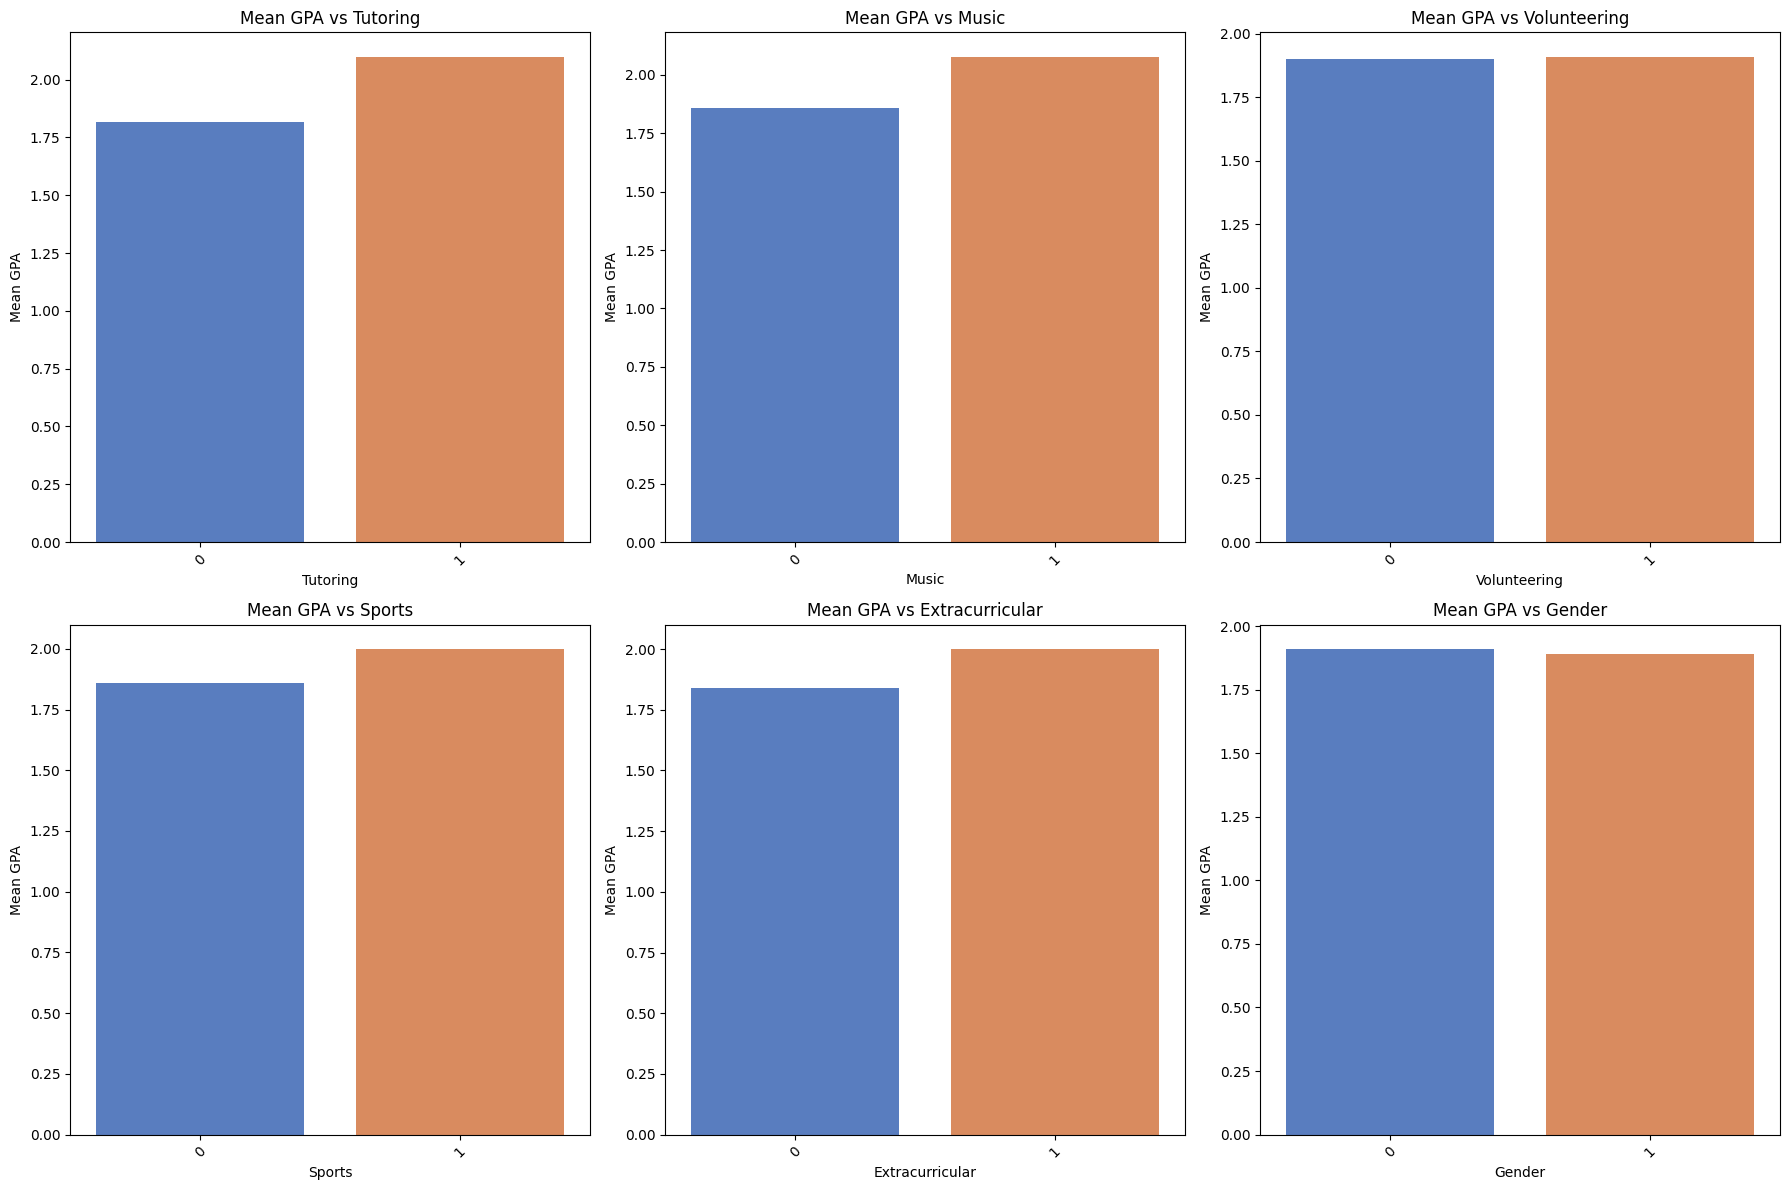

In [10]:
plt.figure(figsize=(18, 12))


binary_columns = ['Tutoring', 'Music', 'Volunteering', 'Sports', 'Extracurricular', 'Gender']


for i, col in enumerate(binary_columns):
    plt.subplot(2, 3, i+1)  
    sns.barplot(x=col, y='GPA', data=df, estimator='mean', errorbar=None, palette='muted', legend=False, hue=col)  
    plt.xlabel(col)  
    plt.ylabel('Mean GPA')  
    plt.title(f'Mean GPA vs {col}')  
    plt.xticks(rotation=45)  


plt.tight_layout()  
plt.show()

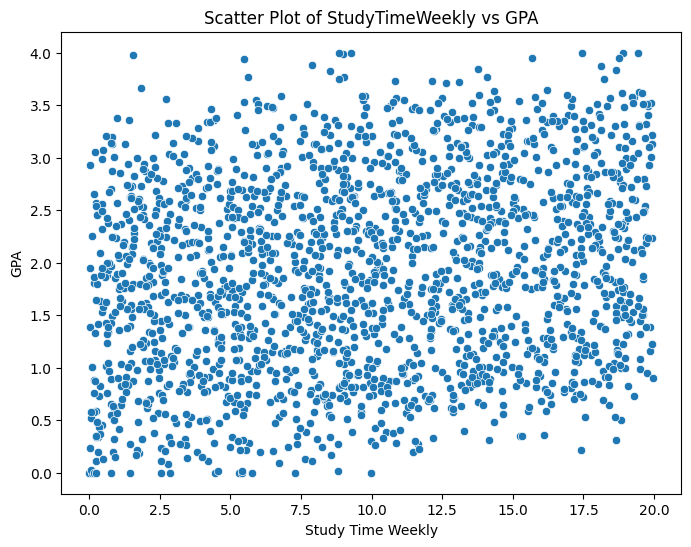

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', data=df)
plt.title('Scatter Plot of StudyTimeWeekly vs GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آموزش مدل
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    حال که داده را پاکسازی کرده و احتمالا ویژگی‌هایی را به آن افزوده یا از آن حذف کرده‌اید، وقت آن است که مدلی آموزش دهید که بتواند متغیر هدف این مسئله را پیش‌بینی کند.
</font>
</p>

In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_idx = [list(x.columns).index(c) for c in cat_cols]

In [13]:
# Model design
# TODO

cat = CatBoostRegressor(iterations=465,
                        depth=6,
                        learning_rate=0.05, 
                        loss_function='MAE',
                        random_state=7, 
                        verbose=100)

train_pool = Pool(x_train, y_train,cat_features=cat_cols_idx)
test_pool = Pool(x_test, y_test, cat_features=cat_cols_idx)

cat.fit(train_pool,eval_set=test_pool)

y_pred = cat.predict(x_test)
y_pred_train = cat.predict(x_train)

clf_ccore(y_test, y_pred,'test')
clf_ccore(y_train, y_pred_train, 'train')


0:	learn: 0.7314403	test: 0.7839894	best: 0.7839894 (0)	total: 172ms	remaining: 1m 19s
100:	learn: 0.1628554	test: 0.1899212	best: 0.1899212 (100)	total: 3.13s	remaining: 11.3s
200:	learn: 0.1353845	test: 0.1762429	best: 0.1762429 (200)	total: 6.08s	remaining: 7.99s
300:	learn: 0.1218366	test: 0.1747312	best: 0.1746653 (298)	total: 9.02s	remaining: 4.92s
400:	learn: 0.1153644	test: 0.1744690	best: 0.1743058 (394)	total: 12s	remaining: 1.91s
464:	learn: 0.1116782	test: 0.1746866	best: 0.1743058 (394)	total: 13.8s	remaining: 0us

bestTest = 0.1743057831
bestIteration = 394

Shrink model to first 395 iterations.
*********test*********
     Metric     Score
0  R2_SCORE  0.947960
1       MSE  0.047496
2       MAE  0.174307
*********train*********
     Metric     Score
0  R2_SCORE  0.964072
1       MSE  0.029485
2       MAE  0.131863


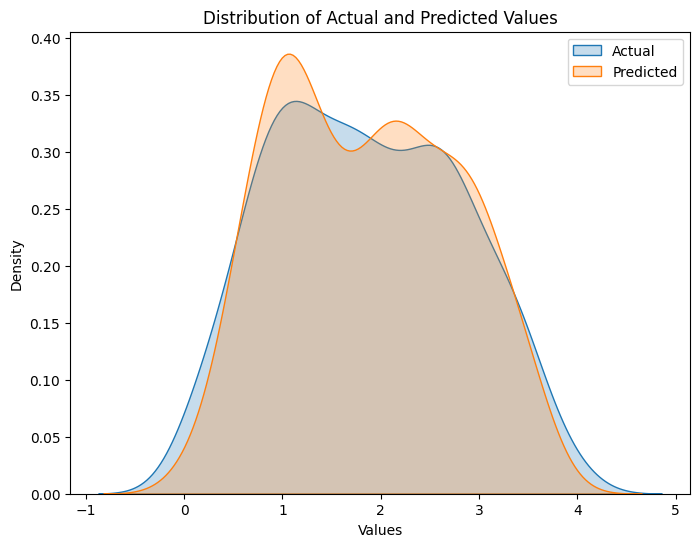

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test, fill=True, label='Actual')
sns.kdeplot(y_pred, fill=True, label='Predicted')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual and Predicted Values')
plt.legend()
plt.show()

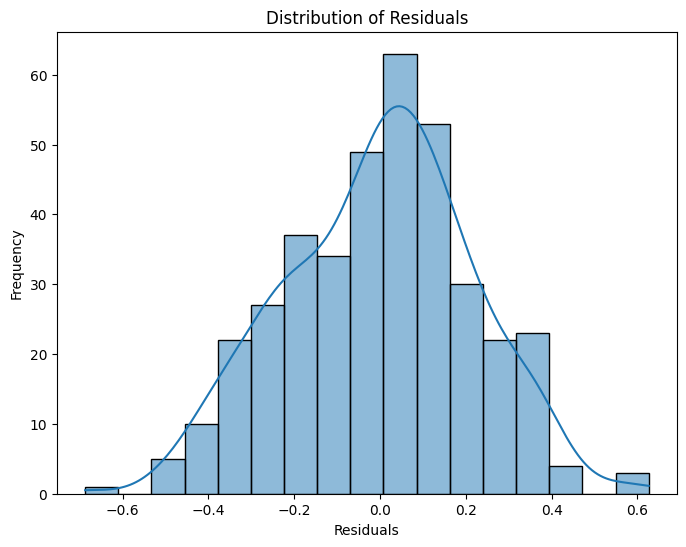

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals') 
plt.ylabel('Frequency')  
plt.title('Distribution of Residuals')  
plt.show()

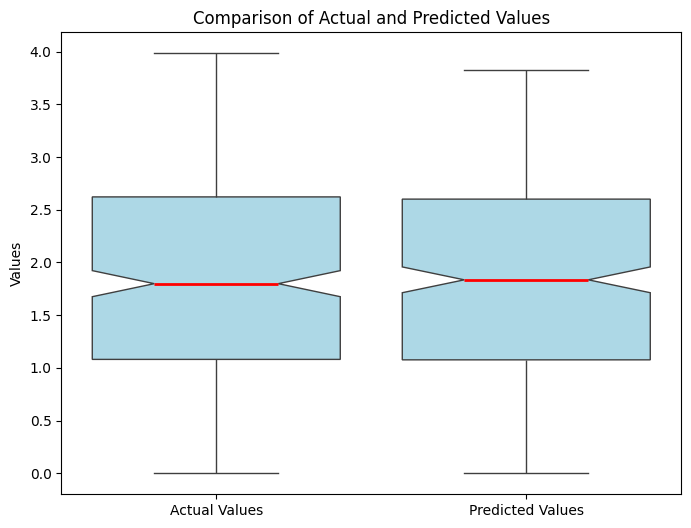

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[y_test, y_pred], notch=True, vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'), 
            medianprops=dict(color='red', linewidth=2))


plt.xticks([0, 1], ['Actual Values', 'Predicted Values'])  
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')

plt.show()

In [17]:
cat_final = CatBoostRegressor(iterations=465,
                        depth=6,
                        learning_rate=0.05, 
                        loss_function='MAE',
                        random_state=7, 
                        verbose=100)

train_pool = Pool(x, y,cat_features=cat_cols_idx)

cat_final.fit(train_pool)
clf_ccore(y_train, y_pred_train, 'train')

0:	learn: 0.7393970	total: 24.1ms	remaining: 11.2s
100:	learn: 0.1605279	total: 3.02s	remaining: 10.9s
200:	learn: 0.1399323	total: 6.13s	remaining: 8.06s
300:	learn: 0.1312473	total: 9.54s	remaining: 5.2s
400:	learn: 0.1266827	total: 12.6s	remaining: 2.01s
464:	learn: 0.1238860	total: 14.7s	remaining: 0us
*********train*********
     Metric     Score
0  R2_SCORE  0.964072
1       MSE  0.029485
2       MAE  0.131863


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معیار ارزیابی
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    معیاری که برای ارزیابی عملکرد مدل انتخاب کرده‌ایم، <code>r2_score</code> نام دارد.
    <br>
    این معیار، سنجه ارزیابی کیفیت مدل شماست. به عبارت بهتر در سامانه داوری هم از همین معیار برای نمره‌دهی استفاده شده است.
    <br>
    پیشنهاد می‌شود با توجه به این معیار، عملکرد مدل خود را بر روی مجموعه‌ی آموزش یا اعتبارسنجی ارزیابی کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font color="red"><b color='red'>توجه:</b></font>
<font face="vazir" size=3>
    برای دریافت نمره از این سوال لازم است تا دقت مدل شما از آستانه‌ی ۰.۴ بیشتر باشد.
    در صورتی که دقت مدل شما از ۰.۴ کمتر باشد نمره شما 
    <b>صفر</b>
    خواهد شد و در غیر این صورت با فرمول زیر محاسبه می‌شود:
</font>
</p>


In [156]:
# evaluate your model

# To-Do

clf_ccore(y_test, y_pred,'test')
clf_ccore(y_train, y_pred_train, 'train')

*********test*********
     Metric     Score
0  R2_SCORE  0.947960
1       MSE  0.047496
2       MAE  0.174307
*********train*********
     Metric     Score
0  R2_SCORE  0.964072
1       MSE  0.029485
2       MAE  0.131863


<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
 پیش‌بینی بر روی داده‌ی تست و خروجی
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    پیش‌بینی مدل خود بر روی داده‌های آزمون را در یک دیتافریم (<code>dataframe</code>) به فرمت زیر ذخیره کنید.
</font>
</p>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    توجه داشته باشید که نام دیتافریم باید <code>submission</code> باشد؛ در غیر این‌صورت، سامانه‌ی داوری قادر به ارزیابی خروجی شما نخواهد بود.
    این دیتافریم تنها شامل ۱ ستون با اسم <code>GPA</code> است و ۴۷۹ سطر دارد.
    <br>
    به ازای هر سطر موجود در مجموعه‌داده‌ی آزمون، باید یک مقدار پیش‌بینی‌شده داشته باشید.
    به‌عنوان مثال جدول زیر، ۵ سطر ابتدایی دیتافریم <code>submission</code> را نشان می‌دهد. البته این اعداد به‌صورت فرضی هستند و در جواب شما، اعداد ستون <code>GPA</code> ممکن است متفاوت باشند.
</font>
</p>

<center>
<div style="direction: ltr;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    
||<code>GPA</code>|
|:----:|:-----:|
|0|2.6765|
|1|3.9865434|
|2|1.0323434|
|3|0.0434253|
|4|2.060680|

</font>
</div>
</center>

In [157]:
answer = cat_final.predict(df_final)

In [158]:
# To-Do
submission = pd.DataFrame(answer, columns=['GPA'])

In [53]:
submission.shape

(479, 1)

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) در غیر این صورت، در پایان مسابقه نمره شما به صفر تغییر خواهد کرد.
    <br>
    همچنین اگر از کولب برای اجرای این فایل نوت‌بوک استفاده می‌کنید، قبل از ارسال فایل <code>result.zip</code>، آخرین نسخه‌ی نوت‌بوک خود را دانلود کرده و داخل فایل ارسالی قرار دهید.
</font>

In [160]:
import zipfile
import os

if not os.path.exists(os.path.join(os.getcwd(), 'Student_GPA.ipynb')):
    %notebook -e Student_GPA.ipynb

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

submission.to_csv('submission.csv', index=False)

file_names = ['Student_GPA.ipynb', 'submission.csv']
compress(file_names)

File Paths:
['Student_GPA.ipynb', 'submission.csv']


In [22]:
#score is 94 